In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

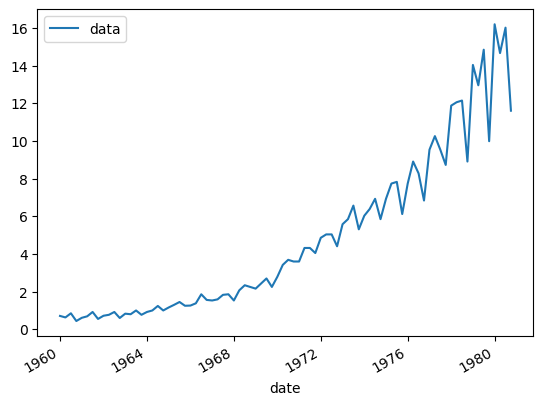

In [34]:
data = pd.read_csv('./data/jj.csv', index_col=0, parse_dates=True)
data.plot();

In [70]:
nums_test = 4
train = data[:-nums_test].copy()
test = data[-nums_test:].copy()
historical_mean = np.mean(train.data)
test['pred_mean'] = historical_mean
test

,data,pred_mean
date,,
1980-01-01,16.20,4.3085
1980-04-01,14.67,4.3085
1980-07-02,16.02,4.3085
1980-10-01,11.61,4.3085


In [71]:
y_true = test.data
y_pred = test.pred_mean
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true * 100)
    
mape(y_true, y_pred)

70.00752579965118

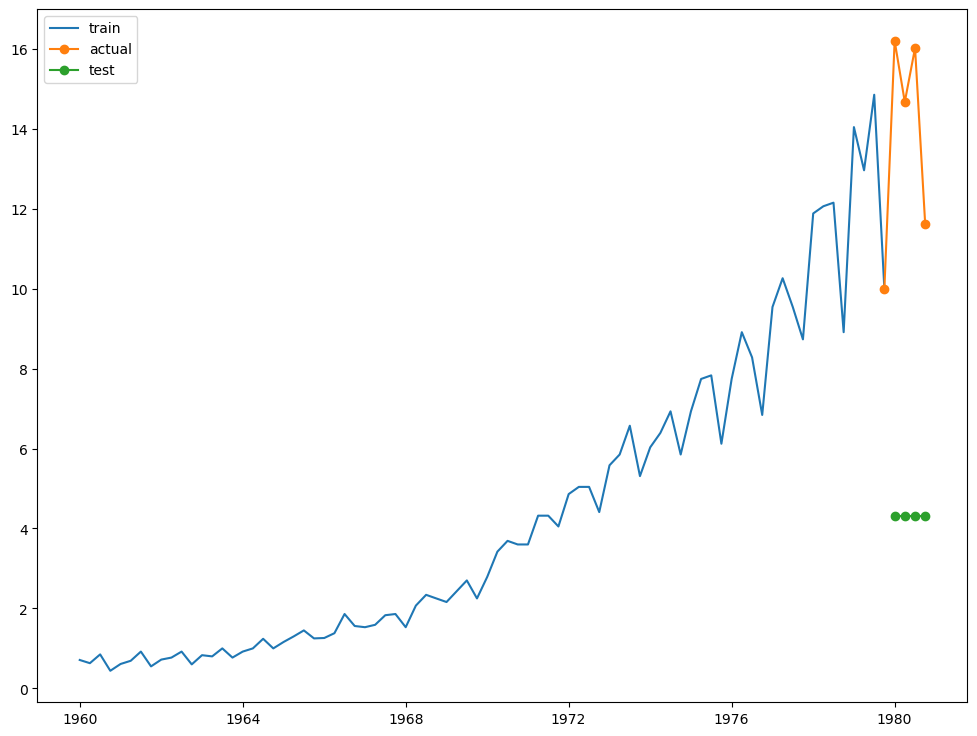

In [77]:
def init_fig(width=12, height=9):
    fig, ax = plt.subplots(figsize=(width, height))
    return fig, ax
def plot_actual():
    ax.plot(train.index.to_list(), train, label="train")
    actual = data[-5:]
    ax.plot(actual.index.to_list(), actual.data, label="actual", marker="o")
def plot_pred():
    ax.plot(test.index.to_list(), test.pred_mean, label="test", marker="o")
def plot_fig():
    ax.legend(loc=2)
fig, ax = init_fig()
plot_actual()
plot_pred()
plot_fig()